In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [36]:
import numpy as np

def brainfog(num=111111):
    num = str(num)
    ordered = ''.join(sorted(num, reverse=True))
    return int(ordered)

brainfog(87491)


98741

In [35]:
brainfog(68436419)

98664431

In [37]:
brainfog()

111111

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


file_to_load = "JEOPARDY_CSV.csv"
jeopardy_data_df = pd.read_csv("JEOPARDY_CSV.csv")

In [109]:
jeopardy_data_df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer,year
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,2004
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,2004
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,2004
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,2004
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,2004


In [5]:
jeopardy_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216930 entries, 0 to 216929
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Show Number  216930 non-null  int64 
 1    Air Date    216930 non-null  object
 2    Round       216930 non-null  object
 3    Category    216930 non-null  object
 4    Value       216930 non-null  object
 5    Question    216930 non-null  object
 6    Answer      216928 non-null  object
dtypes: int64(1), object(6)
memory usage: 11.6+ MB


In [45]:
#need to convert Air Date Column to international date format
jeopardy_data_df[' Air Date']=pd.to_datetime(jeopardy_data_df[' Air Date'])

In [46]:
date_show_ind = jeopardy_data_df.sort_values(" Air Date", ascending=False)

In [ ]:
#2a: There are 216930 rows in the dataframe, and each row represents one question asked during one show.

In [8]:
unique_shows  = jeopardy_data_df[["Show Number"]].nunique()
unique_shows
#2b: There were 3640 shows during this time period.

Show Number    3640
dtype: int64

In [107]:
#convert Air Date to Year, add a column
#use that column to find out how many shows per year

jeopardy_data_df['year'] = pd.DatetimeIndex(jeopardy_data_df[' Air Date']).year
date_show = jeopardy_data_df.drop_duplicates(subset=["Show Number"])
date_show_ind_filtered = date_show.set_index(["year", "Show Number"]).sort_index()
#date_show_ind_filtered
date_show_final = date_show_ind_filtered.groupby(["year"]).count()
date_show_final2 = pd.DataFrame(date_show_final[" Air Date"])
date_show_final2

,Air Date
year,
1984,23
1985,16
1986,25
1987,22
1988,22
1989,36
1990,73
1991,24
1992,32


In [ ]:
#2c: unique_shows_per_year

In [22]:
#3: I wondered about the range of dollar values for the questions, and created a 
#histogram to show me the amounts each question was worth. The histogram also lets
#non-Jeopardy fans know that the show assigns a limited variety of dollar values to 
#the questions.

question_values_not_none = jeopardy_data_df[jeopardy_data_df[" Value"] != "None"]
question_values = question_values_not_none.sort_values(" Value", ascending=False)
question_values

,Show Number,Air Date,Round,Category,Value,Question,Answer
21617,3475,10/15/1999,Jeopardy!,CALIFORNIA DREAMIN',$900,"From the Greek for ""I have found it"", it's Cal...",Eureka
181327,3942,10/23/2001,Jeopardy!,HISTORY TEST,$900,"This ship left Tahiti April 4, 1789, apparentl...",the Bounty
27505,3434,7/8/1999,Double Jeopardy!,1900,$900,The Populists met in May 1900 in South Dakota ...,William Jennings Bryan
120430,5570,11/21/2008,Jeopardy!,THE NET WORKS,$900,This search site was named by its creators fro...,Yahoo!
205851,4962,3/21/2006,Double Jeopardy!,BEFORE HE WAS PRESIDENT,$900,"He was editor & owner of the Marion, Ohio Star...",Warren G. Harding
...,...,...,...,...,...,...,...
84809,1221,12/18/1989,Double Jeopardy!,SICKNESS & HEALTH,"$1,000",In 1799 Sir Humphrey Davy discovered this gas ...,Nitrous Oxide (Laughing Gas)
84808,1221,12/18/1989,Double Jeopardy!,FRANCE,"$1,000",The cathedral in this town 50 mi. SW of Paris ...,Chartres
84807,1221,12/18/1989,Double Jeopardy!,PRESIDENTIAL DAUGHTERS,"$1,000",For a brief time in the 1960s actor George Ham...,Lynda Bird Johnson
159215,3901,7/16/2001,Double Jeopardy!,WORLD LITERATURE,"$1,000","Tant pis, the crucial expanison of existential...",(Albert) Camus


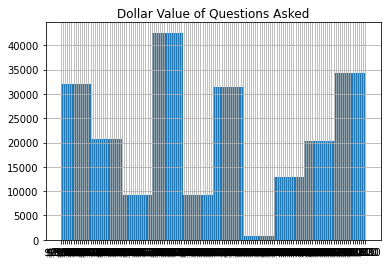

In [29]:
question_values[" Value"].hist()
plt.title("Dollar Value of Questions Asked")
plt.show()